### TFT PIPELINE

In [1]:
import sys
sys.path.insert(0, '/Users/florianrunkel/Documents/02_Uni/04_Masterarbeit/masterthesis/')

from backend.ml_pipe.data.dataModule.tft.dataModule import DataModule

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from backend.ml_pipe.data.database.mongodb import MongoDb
import pandas as pd
import matplotlib.pyplot as plt

def load_and_filter_labels_from_mongodb(
    user="florianrunkel",
    password="ur04mathesis",
    db_name="Database",
    collection="timeseries_dataset",
    top_n_remove=5,
    show_plot=True
):
    # 1. Daten laden
    mongo_client = MongoDb(user=user, password=password, db_name=db_name)
    result = mongo_client.get_all(collection)
    raw_data = result.get('data', [])
    df = pd.DataFrame(raw_data)

    # 2. Label bereinigen
    df["label"] = pd.to_numeric(df["label"], errors="coerce")
    df = df[df["label"].notna()]
    df = df[df["label"] > 0]

    # 3. Häufigste Labels identifizieren
    top_labels = df["label"].value_counts().nlargest(5).index.tolist()
    print("Häufigste Labels (werden gefiltert):", top_labels)

    # 5. Plot (optional)
    if show_plot:
        plt.figure(figsize=(10, 6))
        plt.hist(df["label"], bins=50)
        plt.title("Verteilung der Labels (gefiltert)")
        plt.xlabel("label (Tage)")
        plt.ylabel("Anzahl")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # 6. Zusammenfassung
    print(f"Datensätze nach Filterung: {len(df)}")
    print(f"Minimales Label: {df['label'].min()}")
    print(f"Maximales Label: {df['label'].max()}")
    print(f"Durchschnittliches Label: {df['label'].mean():.2f}")

    return df

In [3]:
from lightning.pytorch.callbacks import Callback

class PrintLossCallback(Callback):
    def on_train_epoch_end(self, trainer, pl_module):
        loss = trainer.callback_metrics.get("train_loss")
        if loss is not None:
            print(f"Train Loss (Epoch {trainer.current_epoch}): {loss:.4f}")

    def on_validation_epoch_end(self, trainer, pl_module):
        loss = trainer.callback_metrics.get("val_loss")
        if loss is not None:
            print(f"Val Loss (Epoch {trainer.current_epoch}): {loss:.4f}")


Start optimized TFT pipeline...
Load data from MongoDB...
Häufigste Labels (werden gefiltert): [46, 16, 92, 31, 183]


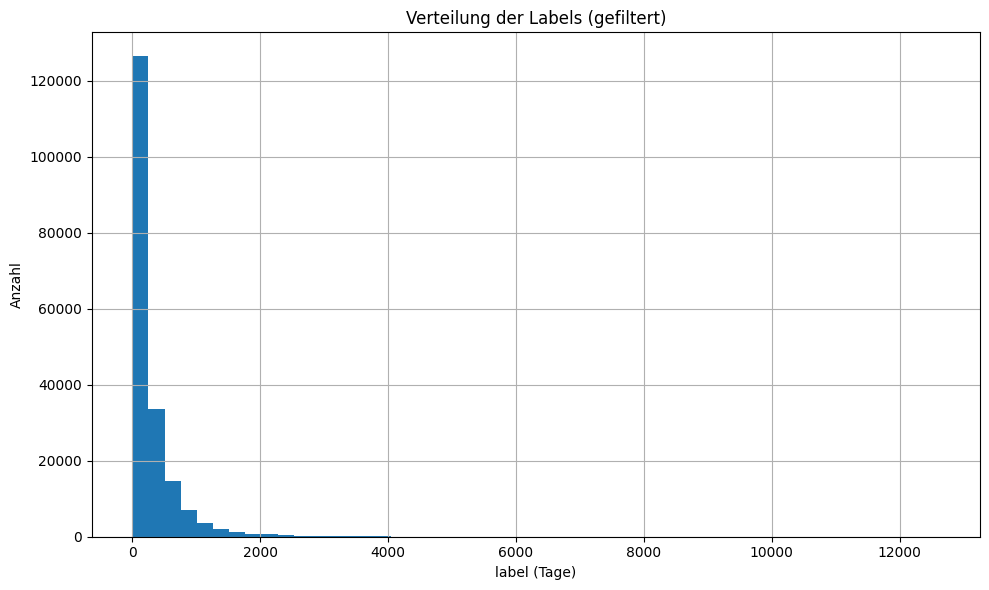

INFO:root:Setting up TFT DataModule with extended features...


Datensätze nach Filterung: 191828
Minimales Label: 3
Maximales Label: 12624
Durchschnittliches Label: 295.60


INFO:root:Number of documents: 191828


DEBUG - Profile 0, Time 0:
  Features (erste 10): [981.0, 1.0, 2.0, 700.0, 2.0, 1.0, 7.0, 180.0, 0.0, 6.0]
  Label: 168.0
  Position: Working Student
  Feature-Summe: 1884.2076836824417
DEBUG - Profile 0, Time 1:
  Features (erste 10): [1019.0, 1.0, 2.0, 700.0, 2.0, 1.0, 7.0, 180.0, 0.0, 2.0]
  Label: 168.0
  Position: Working Student
  Feature-Summe: 2627.3863815814257
DEBUG - Profile 0, Time 2:
  Features (erste 10): [1057.0, 1.0, 2.0, 700.0, 2.0, 1.0, 7.0, 180.0, 0.0, 5.0]
  Label: 168.0
  Position: Working Student
  Feature-Summe: 2666.802551165223
DEBUG - Profile 0, Time 3:
  Features (erste 10): [1080.0, 1.0, 2.0, 700.0, 2.0, 1.0, 7.0, 180.0, 0.0, 0.0]
  Label: 168.0
  Position: Working Student
  Feature-Summe: 2687.633974611759
DEBUG - Profile 0, Time 4:
  Features (erste 10): [1157.0, 2.0, 3.0, 426.5, 2.0, 1.0, 7.0, 180.0, 0.0, 0.0]
  Label: 168.0
  Position: Intern
  Feature-Summe: 2497.133974611759
DEBUG - Filterung:
  Gesamte Zeilen: 191828
  Gefilterte Zeilen (alle Features

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pytorch_forecasting/data/timeseries.py:1831: UserWarning: Min encoder length and/or min_prediction_idx and/or min prediction length and/or lags are too large for 409 series/groups which therefore are not present in the dataset index. This means no predictions can be made for those series. First 10 removed groups: [{'__group_id__profile_id': 12}, {'__group_id__profile_id': 15}, {'__group_id__profile_id': 17}, {'__group_id__profile_id': 20}, {'__group_id__profile_id': 25}, {'__group_id__profile_id': 28}, {'__group_id__profile_id': 31}, {'__group_id__profile_id': 32}, {'__group_id__profile_id': 55}, {'__group_id__profile_id': 59}]
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pytorch_forecasting/data/encoders.py:400: UserWarning: Found 5305 unknown classes which were set to NaN
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/

Training: 130842
Validation: 60986
Start hyperparameter optimization...
Count of Trials: 10

Trial 1/10
Parameter: {'learning_rate': 0.001, 'hidden_size': 128, 'attention_head_size': 4, 'dropout': 0.3, 'hidden_continuous_size': 16, 'output_size': 7}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.

   | Name                               | Type               

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_MAE          │     78.77069854736328     │
│         val_MAPE          │    1.8945027589797974     │
│         val_RMSE          │    116.46837615966797     │
│         val_SMAPE         │    0.8695759773254395     │
│         val_loss          │    60.598594665527344     │
└───────────────────────────┴───────────────────────────┘

Trial 1 - Val Loss: 60.5986

Trial 2/10
Parameter: {'learning_rate': 0.01, 'hidden_size': 32, 'attention_head_size': 4, 'dropout': 0.3, 'hidden_continuous_size': 32, 'output_size': 7}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 653 K  | train
3  | prescalers                         | ModuleDict                      | 1.8 K  | train
4  | static_variable_selection          | VariableSelectionNetwork        | 13.7 K | train
5  | encoder_variable_selection         | VariableSelectionNetwork        | 131 K  | train
6  | decoder_variable_selection         | VariableSelectionNetwork        | 8.9 K  | train
7  | static_context_variable_selection  | GatedResidualNet

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_MAE          │     64.77690124511719     │
│         val_MAPE          │    1.7661365270614624     │
│         val_RMSE          │    103.82913208007812     │
│         val_SMAPE         │    0.6767149567604065     │
│         val_loss          │     32.50899124145508     │
└───────────────────────────┴───────────────────────────┘

Trial 2 - Val Loss: 32.5090

Trial 3/10
Parameter: {'learning_rate': 0.05, 'hidden_size': 16, 'attention_head_size': 4, 'dropout': 0.3, 'hidden_continuous_size': 8, 'output_size': 7}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 326 K  | train
3  | prescalers                         | ModuleDict                      | 448    | train
4  | static_variable_selection          | VariableSelectionNetwork        | 1.9 K  | train
5  | encoder_variable_selection         | VariableSelectionNetwork        | 17.9 K | train
6  | decoder_variable_selection         | VariableSelectionNetwork        | 1.2 K  | train
7  | static_context_variable_selection  | GatedResidualNet

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_MAE          │     78.80184936523438     │
│         val_MAPE          │     1.897324800491333     │
│         val_RMSE          │    116.48341369628906     │
│         val_SMAPE         │    0.8695213198661804     │
│         val_loss          │     38.39811325073242     │
└───────────────────────────┴───────────────────────────┘

Trial 3 - Val Loss: 38.3981

Trial 4/10
Parameter: {'learning_rate': 0.001, 'hidden_size': 64, 'attention_head_size': 4, 'dropout': 0.05, 'hidden_continuous_size': 32, 'output_size': 7}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 1.3 M  | train
3  | prescalers                         | ModuleDict                      | 1.8 K  | train
4  | static_variable_selection          | VariableSelectionNetwork        | 21.1 K | train
5  | encoder_variable_selection         | VariableSelectionNetwork        | 191 K  | train
6  | decoder_variable_selection         | VariableSelectionNetwork        | 13.7 K | train
7  | static_context_variable_selection  | GatedResidualNet

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_MAE          │     78.68314361572266     │
│         val_MAPE          │    1.9246360063552856     │
│         val_RMSE          │    116.45658111572266     │
│         val_SMAPE         │    0.8462271690368652     │
│         val_loss          │     67.49480438232422     │
└───────────────────────────┴───────────────────────────┘

Trial 4 - Val Loss: 67.4948

Trial 5/10
Parameter: {'learning_rate': 0.05, 'hidden_size': 128, 'attention_head_size': 2, 'dropout': 0.05, 'hidden_continuous_size': 16, 'output_size': 7}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 2.0 M  | train
3  | prescalers                         | ModuleDict                      | 896    | train
4  | static_variable_selection          | VariableSelectionNetwork        | 17.8 K | train
5  | encoder_variable_selection         | VariableSelectionNetwork        | 154 K  | train
6  | decoder_variable_selection         | VariableSelectionNetwork        | 11.5 K | train
7  | static_context_variable_selection  | GatedResidualNet

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_MAE          │     53.08723068237305     │
│         val_MAPE          │    0.9663479328155518     │
│         val_RMSE          │     83.45801544189453     │
│         val_SMAPE         │     1.082358479499817     │
│         val_loss          │    25.726348876953125     │
└───────────────────────────┴───────────────────────────┘

Trial 5 - Val Loss: 25.7263

Trial 6/10
Parameter: {'learning_rate': 0.001, 'hidden_size': 64, 'attention_head_size': 4, 'dropout': 0.1, 'hidden_continuous_size': 16, 'output_size': 7}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 1.3 M  | train
3  | prescalers                         | ModuleDict                      | 896    | train
4  | static_variable_selection          | VariableSelectionNetwork        | 9.9 K  | train
5  | encoder_variable_selection         | VariableSelectionNetwork        | 90.5 K | train
6  | decoder_variable_selection         | VariableSelectionNetwork        | 6.4 K  | train
7  | static_context_variable_selection  | GatedResidualNet

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_MAE          │     78.69819641113281     │
│         val_MAPE          │    1.9252210855484009     │
│         val_RMSE          │    116.47078704833984     │
│         val_SMAPE         │    0.8462444543838501     │
│         val_loss          │     67.51174926757812     │
└───────────────────────────┴───────────────────────────┘

Trial 6 - Val Loss: 67.5117

Trial 7/10
Parameter: {'learning_rate': 0.005, 'hidden_size': 128, 'attention_head_size': 2, 'dropout': 0.1, 'hidden_continuous_size': 8, 'output_size': 7}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 2.0 M  | train
3  | prescalers                         | ModuleDict                      | 448    | train
4  | static_variable_selection          | VariableSelectionNetwork        | 10.3 K | train
5  | encoder_variable_selection         | VariableSelectionNetwork        | 87.9 K | train
6  | decoder_variable_selection         | VariableSelectionNetwork        | 6.5 K  | train
7  | static_context_variable_selection  | GatedResidualNet

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_MAE          │     60.1810188293457      │
│         val_MAPE          │    1.2897931337356567     │
│         val_RMSE          │     92.11439514160156     │
│         val_SMAPE         │     1.170434594154358     │
│         val_loss          │    32.312381744384766     │
└───────────────────────────┴───────────────────────────┘

Trial 7 - Val Loss: 32.3124

Trial 8/10
Parameter: {'learning_rate': 0.01, 'hidden_size': 128, 'attention_head_size': 8, 'dropout': 0.3, 'hidden_continuous_size': 32, 'output_size': 7}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 2.0 M  | train
3  | prescalers                         | ModuleDict                      | 1.8 K  | train
4  | static_variable_selection          | VariableSelectionNetwork        | 35.0 K | train
5  | encoder_variable_selection         | VariableSelectionNetwork        | 306 K  | train
6  | decoder_variable_selection         | VariableSelectionNetwork        | 22.9 K | train
7  | static_context_variable_selection  | GatedResidualNet

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_MAE          │     56.43339920043945     │
│         val_MAPE          │     1.366641640663147     │
│         val_RMSE          │     93.10116577148438     │
│         val_SMAPE         │    0.7656881213188171     │
│         val_loss          │     27.56707191467285     │
└───────────────────────────┴───────────────────────────┘

Trial 8 - Val Loss: 27.5671

Trial 9/10
Parameter: {'learning_rate': 0.001, 'hidden_size': 128, 'attention_head_size': 4, 'dropout': 0.2, 'hidden_continuous_size': 16, 'output_size': 7}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 2.0 M  | train
3  | prescalers                         | ModuleDict                      | 896    | train
4  | static_variable_selection          | VariableSelectionNetwork        | 17.8 K | train
5  | encoder_variable_selection         | VariableSelectionNetwork        | 154 K  | train
6  | decoder_variable_selection         | VariableSelectionNetwork        | 11.5 K | train
7  | static_context_variable_selection  | GatedResidualNet

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_MAE          │     78.76361846923828     │
│         val_MAPE          │    1.8980129957199097     │
│         val_RMSE          │    116.48558044433594     │
│         val_SMAPE         │    0.8663915395736694     │
│         val_loss          │     60.63336181640625     │
└───────────────────────────┴───────────────────────────┘

Trial 9 - Val Loss: 60.6334

Trial 10/10
Parameter: {'learning_rate': 0.1, 'hidden_size': 32, 'attention_head_size': 4, 'dropout': 0.3, 'hidden_continuous_size': 8, 'output_size': 7}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 653 K  | train
3  | prescalers                         | ModuleDict                      | 448    | train
4  | static_variable_selection          | VariableSelectionNetwork        | 3.1 K  | train
5  | encoder_variable_selection         | VariableSelectionNetwork        | 30.3 K | train
6  | decoder_variable_selection         | VariableSelectionNetwork        | 1.9 K  | train
7  | static_context_variable_selection  | GatedResidualNet

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_MAE          │     78.6399154663086      │
│         val_MAPE          │    1.9587898254394531     │
│         val_RMSE          │    116.51493072509766     │
│         val_SMAPE         │    0.8230990171432495     │
│         val_loss          │     38.34830856323242     │
└───────────────────────────┴───────────────────────────┘

Trial 10 - Val Loss: 38.3483

Optimization completed!
Best parameters: {'learning_rate': 0.05, 'hidden_size': 128, 'attention_head_size': 2, 'dropout': 0.05, 'hidden_continuous_size': 16, 'output_size': 7}
Best score: 25.7263

Training with best parameters: {'learning_rate': 0.05, 'hidden_size': 128, 'attention_head_size': 2, 'dropout': 0.05, 'hidden_continuous_size': 16, 'output_size': 7}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Number of parameters in network: 3053.1k
Start training with optimized parameters...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:654: Checkpoint directory /Users/florianrunkel/Documents/02_Uni/04_Masterarbeit/masterthesis/backend/ml_pipe/models/tft/checkpoints exists and is not empty.

   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 2.0 M  | train
3  | prescalers                         | ModuleDict                      | 896    | train
4  | static_variable_selection          | VariableSelectionNetwork        | 17.8 K | train
5  | encoder_variable_selection         | VariableSelectionNetwork     

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 15: 100%|██████████| 2145/2145 [02:39<00:00, 13.44it/s, v_num=25, train_loss_step=17.70, val_loss=25.90, train_loss_epoch=16.20]
Best model: /Users/florianrunkel/Documents/02_Uni/04_Masterarbeit/masterthesis/backend/ml_pipe/models/tft/checkpoints/tft-optimized-epoch=05-val_loss=25.14.ckpt


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'predict_dataloader' to speed up the dataloader worker initialization.



Final evaluation results:
   MAE: 50.04 Tage
   RMSE: 91.23 Tage
Optimized model saved: ./saved_models/tft_optimized_20250808_122135.ckpt


In [4]:
import random
import torch
from pytorch_forecasting import TemporalFusionTransformer, QuantileLoss
from pytorch_forecasting.metrics import MAE, RMSE
from lightning.pytorch import Trainer
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor, ModelCheckpoint
from lightning.pytorch.loggers import TensorBoardLogger
import os
from datetime import datetime

def optimize_hyperparameters(datamodule, n_trials=10, max_epochs_per_trial=5):
    print("Start hyperparameter optimization...")
    print(f"Count of Trials: {n_trials}")

    results = []

    # Parameter-Ranges definieren
    param_ranges = {
        'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
        'hidden_size': [16, 32, 64, 128],
        'attention_head_size': [2, 4, 8],
        'dropout': [0.05, 0.1, 0.2, 0.3],
        'hidden_continuous_size': [8, 16, 32]
    }

    for trial in range(n_trials):
        print(f"\nTrial {trial + 1}/{n_trials}")

        # Zufällige Parameter auswählen
        params = {
            'learning_rate': random.choice(param_ranges['learning_rate']),
            'hidden_size': random.choice(param_ranges['hidden_size']),
            'attention_head_size': random.choice(param_ranges['attention_head_size']),
            'dropout': random.choice(param_ranges['dropout']),
            'hidden_continuous_size': random.choice(param_ranges['hidden_continuous_size']),
            'output_size': 7  # Fix
        }

        print(f"Parameter: {params}")

        try:
            # Modell mit aktuellen Parametern erstellen
            model = TemporalFusionTransformer.from_dataset(
                datamodule.training_dataset,
                loss=QuantileLoss(),
                log_interval=10,
                reduce_on_plateau_patience=4,
                **params
            )

            # Kurzes Training für Evaluation
            trainer = Trainer(
                max_epochs=max_epochs_per_trial,
                accelerator="cpu",  # CPU für Konsistenz
                devices=1,
                enable_checkpointing=False,
                enable_progress_bar=False,
                logger=False,
            )

            # Training
            trainer.fit(
                model,
                train_dataloaders=datamodule.train_dataloader(),
                val_dataloaders=datamodule.val_dataloader(),
            )
            # Validation Loss abrufen
            val_loss = trainer.validate(model, dataloaders=datamodule.val_dataloader())[0]['val_loss']

            results.append({
                'trial': trial + 1,
                'params': params,
                'val_loss': val_loss
            })

            print(f"Trial {trial + 1} - Val Loss: {val_loss:.4f}")

        except Exception as e:
            print(f"Trial {trial + 1} failed: {e}")
            results.append({
                'trial': trial + 1,
                'params': params,
                'val_loss': float('inf')
            })
    # Beste Parameter finden
    best_result = min(results, key=lambda x: x['val_loss'])
    best_params = best_result['params']
    best_score = best_result['val_loss']

    print(f"\nOptimization completed!")
    print(f"Best parameters: {best_params}")
    print(f"Best score: {best_score:.4f}")

    return best_params, results

def run_pipeline():
    print("Start optimized TFT pipeline...")

    # 1. Daten laden
    print("Load data from MongoDB...")
    df = load_and_filter_labels_from_mongodb()

    datamodule = DataModule(df)
    datamodule.setup()
    print(f"Training: {len(datamodule.training)}")
    print(f"Validation: {len(datamodule.validation)}")

    # 2. Hyperparameter-Optimierung
    best_params, optimization_results = optimize_hyperparameters(datamodule, n_trials=10, max_epochs_per_trial=5)

    # 3. Training mit besten Parametern
    print(f"\nTraining with best parameters: {best_params}")

    model = TemporalFusionTransformer.from_dataset(
        datamodule.training_dataset,
        loss=QuantileLoss(),
        log_interval=10,
        reduce_on_plateau_patience=4,
        **best_params
    )
    print(f"Number of parameters in network: {model.size()/1e3:.1f}k")

    # Callbacks
    lr_logger = LearningRateMonitor()
    checkpoint_callback = ModelCheckpoint(
        monitor="val_loss",
        dirpath="checkpoints",
        filename="tft-optimized-{epoch:02d}-{val_loss:.2f}",
        save_top_k=1,
        mode="min",
    )
    early_stopping = EarlyStopping(
        monitor="val_loss",
        patience=10,
        mode="min"
    )

    # Trainer
    trainer = Trainer(
        max_epochs=50,
        accelerator="gpu" if torch.cuda.is_available() else "cpu",
        devices=1,
        gradient_clip_val=0.1,
        log_every_n_steps=10,
        enable_checkpointing=True,
        callbacks=[lr_logger, checkpoint_callback, early_stopping, PrintLossCallback()],
        logger=TensorBoardLogger(save_dir="logs"),
        deterministic=True,
    )

    # Training
    print("Start training with optimized parameters...")
    trainer.fit(
        model,
        train_dataloaders=datamodule.train_dataloader(),
        val_dataloaders=datamodule.val_dataloader(),
    )
    # Evaluation
    best_model_path = checkpoint_callback.best_model_path
    print(f"Best model: {best_model_path}")

    best_model = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

    # Evaluation auf Validierungsdaten
    val_dataloader = datamodule.val_dataloader()
    actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])
    predictions = best_model.predict(val_dataloader)
    actuals = actuals.to(predictions.device)

    # Metriken
    mae_metric = MAE().to(predictions.device)
    rmse_metric = RMSE().to(predictions.device)
    mae = mae_metric(predictions, actuals)
    rmse = rmse_metric(predictions, actuals)

    print(f"\nFinal evaluation results:")
    print(f"   MAE: {mae:.2f} Tage")
    print(f"   RMSE: {rmse:.2f} Tage")

    # Modell speichern
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_path = f"./saved_models/tft_optimized_{timestamp}.ckpt"
    os.makedirs(os.path.dirname(model_path), exist_ok=True)
    trainer.save_checkpoint(model_path)
    print(f"Optimized model saved: {model_path}")
    return best_model, trainer, optimization_results

# Verwendung:
nest_model, trainer, optimization_results = run_pipeline()

INFO:tensorboard:No path found after logs/lightning_logs/version_25/events.out.tfevents.1754645962.Laptop-von-Florian.fritz.box.68067.0


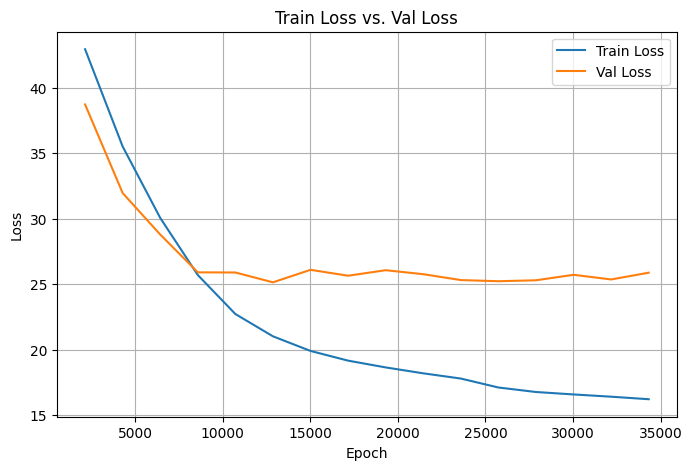

In [5]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt

# EventAccumulator initialisieren und laden
ea = event_accumulator.EventAccumulator(trainer.logger.log_dir)
ea.Reload()

# Die richtigen Keys für die Losses
val_loss = ea.Scalars('val_loss')
train_loss = ea.Scalars('train_loss_epoch')

# Plot
plt.figure(figsize=(8,5))
plt.plot([x.step for x in train_loss], [x.value for x in train_loss], label='Train Loss')
plt.plot([x.step for x in val_loss], [x.value for x in val_loss], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Loss vs. Val Loss')
plt.legend()
plt.grid(True)
plt.show()

INFO:tensorboard:No path found after logs/lightning_logs/version_25/events.out.tfevents.1754645962.Laptop-von-Florian.fritz.box.68067.0


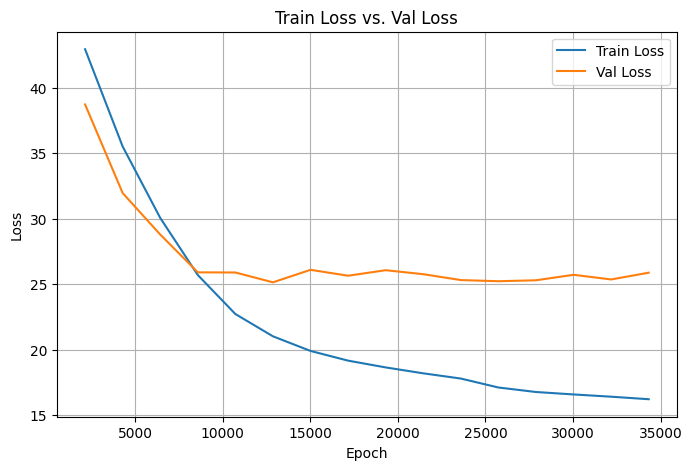

In [6]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt

# EventAccumulator initialisieren und laden
ea = event_accumulator.EventAccumulator(trainer.logger.log_dir)
ea.Reload()

# Die richtigen Keys für die Losses
val_loss = ea.Scalars('val_loss')
train_loss = ea.Scalars('train_loss_epoch')

# Plot
plt.figure(figsize=(8,5))
plt.plot([x.step for x in train_loss], [x.value for x in train_loss], label='Train Loss')
plt.plot([x.step for x in val_loss], [x.value for x in val_loss], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Loss vs. Val Loss')
plt.legend()
plt.grid(True)
plt.show()

INFO:tensorboard:No path found after logs/lightning_logs/version_25/events.out.tfevents.1754645962.Laptop-von-Florian.fritz.box.68067.0


hp_metric
lr-Adam
train_loss_step
epoch
val_loss
val_SMAPE
val_MAE
val_RMSE
val_MAPE
train_loss_epoch


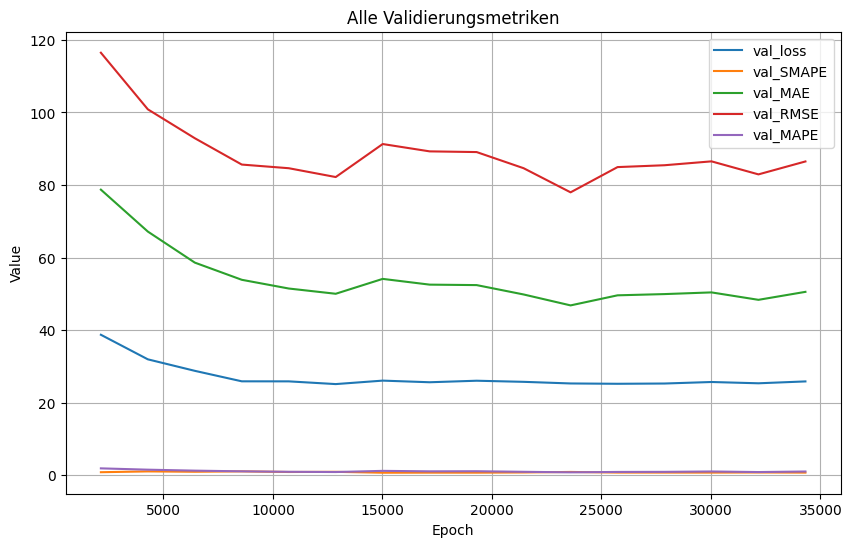

In [7]:
from tensorboard.backend.event_processing import event_accumulator

ea = event_accumulator.EventAccumulator(trainer.logger.log_dir)
ea.Reload()

for key in ea.Tags()['scalars']:
    print(key)

val_keys = [k for k in ea.Tags()['scalars'] if k.startswith('val_')]
plt.figure(figsize=(10,6))
for key in val_keys:
    values = ea.Scalars(key)
    plt.plot([x.step for x in values], [x.value for x in values], label=key)
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Alle Validierungsmetriken')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
import sys
sys.path.insert(0, '/Users/florianrunkel/Documents/02_Uni/04_Masterarbeit/masterthesis/')

linkedin_data = {"skills":["Multitasking","Kundenservice","Interpersonelle Fähigkeiten","Kaltakquise","Hubspot CRM","Customer-Relationship-Management (CRM)"],"firstName":"Darya","lastName":"Chernuska","profilePicture":"https://media.licdn.com/dms/image/v2/D4E03AQE0yuZ6cg8f4A/profile-displayphoto-shrink_100_100/profile-displayphoto-shrink_100_100/0/1670856025914?e=1749686400&v=beta&t=jI1mkiVnkD7teWPncsg8QtKAwZKB-az53_4ny7C7XvI","linkedinProfile":"https://www.linkedin.com/in/daryachernuska","education":[{"duration":"01/01/2017 - 01/01/2022","institution":"Ludwig-Maximilians-Universität München","endDate":"01/01/2022","degree":"","startDate":"01/01/2017"}],"providerId":"ACoAAD0rz_IBI0XfqqBDUscwHoFwuOqJa_c5T2I","workExperience":[{"duration":"01/03/2023 - Present","endDate":"Present","companyInformation":{"employee_count":515,"activities":["Telefonie","Internet","Vernetzung","Rechenzentrum","Glasfaser","Highspeed-Internet","Business-Internet","SIP-Trunk","Cloud-Lösungen","Connect-Cloud","Connect-LAN","Premium IP","Internet + Telefonie","Lösungen für Geschäftskunden"],"name":"M-net Telekommunikations GmbH","description":"Als regionaler Telekommunikationsanbieter versorgt M-net große Teile Bayerns, den Großraum Ulm sowie weite Teile des hessischen Landkreises Main-Kinzig mit zukunftssicherer Kommunikationstechnologie.","industry":["Telecommunications"]},"description":"","company":"M-net Telekommunikations GmbH","location":"München, Bayern, Deutschland · Hybrid","position":"Disponentin","startDate":"01/03/2023"},{"duration":"01/08/2022 - 01/12/2022","endDate":"01/12/2022","companyInformation":{"employee_count":2048,"activities":["HR Software","HR Management","Recruitung","Employee Management","Applicant Tracking System","Employee Selfservice","Time-Off Management","Cloud Software","Onboarding and Offboarding","HR Reporting","Performance Management","Payroll","HR","HR Tech","Human Resources"],"name":"Personio","description":"Personio's Intelligent HR Platform helps small and medium-sized organizations unlock the power of people by making complicated, time-consuming tasks simple and efficient.","industry":["Software Development"]},"description":"","company":"Personio","location":"München, Bayern, Deutschland","position":"Sales Development Representative","startDate":"01/08/2022"},{"duration":"01/11/2017 - 01/07/2022","endDate":"01/07/2022","companyInformation":{"employee_count":662,"activities":["Scandinavian design","Furniture","Design","Product design","Retail","Web","Steelcase partner","Wholesale","B2B","Contract sales","Online","Digital","Creativity"],"name":"BOLIA","description":"Our collection is inspired by the vivid Scandinavian nature","industry":["Retail Furniture and Home Furnishings"]},"description":"","company":"Bolia.com","location":"München, Bayern, Deutschland","position":"Sales Consultant","startDate":"01/11/2017"},{"duration":"01/10/2015 - 01/11/2017","endDate":"01/11/2017","companyInformation":{},"description":"","company":"Pepperminds","location":"München, Bayern, Deutschland","position":"Senior Team Lead","startDate":"01/10/2015"}],"location":"Munich, Bavaria, Germany","certifications":[],"headline":"-","languageSkills":{}}

from backend.ml_pipe.models.tft.predict import predict
prediction = predict(linkedin_data)
print(prediction)


=== Start prediction ===
Extracted features: 4 rows
Career history: [{'duration': '01/03/2023 - Present', 'endDate': 'Present', 'companyInformation': {'employee_count': 515, 'activities': ['Telefonie', 'Internet', 'Vernetzung', 'Rechenzentrum', 'Glasfaser', 'Highspeed-Internet', 'Business-Internet', 'SIP-Trunk', 'Cloud-Lösungen', 'Connect-Cloud', 'Connect-LAN', 'Premium IP', 'Internet + Telefonie', 'Lösungen für Geschäftskunden'], 'name': 'M-net Telekommunikations GmbH', 'description': 'Als regionaler Telekommunikationsanbieter versorgt M-net große Teile Bayerns, den Großraum Ulm sowie weite Teile des hessischen Landkreises Main-Kinzig mit zukunftssicherer Kommunikationstechnologie.', 'industry': ['Telecommunications']}, 'description': '', 'company': 'M-net Telekommunikations GmbH', 'location': 'München, Bayern, Deutschland · Hybrid', 'position': 'Disponentin', 'startDate': '01/03/2023'}, {'duration': '01/08/2022 - 01/12/2022', 'endDate': '01/12/2022', 'companyInformation': {'employee

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Make prediction...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pytorch_forecasting/models/base_model.py:121: UserWarning: Not all dimensions are equal for tensors shapes. Example tensor torch.Size([1, 2, 4, 4]). Returning list instead of torch.Tensor.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pytorch_forecasting/models/base_model.py:121: UserWarning: Not all dimensions are equal for tensors shapes. Example tensor torch.Size([1, 2, 4, 2]). Returning list instead of torch.Tensor.
  warnings.warn(


Raw prediction: [[[0.0, 0.0, 16.099853515625, 891.6622314453125, 916.978515625, 939.0582885742188, 961.6800537109375], [0.0, 0.0, 17.00970458984375, 888.8223266601562, 913.9732666015625, 936.02734375, 959.64697265625]], [[33.71063232421875, 91.7713623046875, 174.9638671875, 937.5586547851562, 943.5932006835938, 948.8369140625, 957.7655639648438], [31.9320068359375, 91.79144287109375, 175.84857177734375, 935.3740234375, 942.7050170898438, 950.4110717773438, 961.4967651367188]], [[729.75244140625, 762.581787109375, 780.4076538085938, 830.4539184570312, 843.9400634765625, 851.5758056640625, 861.0086669921875], [707.2185668945312, 772.89013671875, 802.4800415039062, 815.603515625, 837.2194213867188, 854.458984375, 873.0745239257812]], [[780.0714111328125, 870.5175170898438, 912.9130859375, 932.337158203125, 954.3026733398438, 970.1423950195312, 991.0299072265625], [nan, nan, nan, nan, nan, nan, nan]], [[0.0, 0.0, 20.10467529296875, 893.9530029296875, 918.7333374023438, 940.32421875, 962.48